In [1]:
import scipy
from sympy import Function, Symbol, Derivative, diff, integrate, Piecewise
from sympy import sin, pi, sqrt, oo
from sympy.physics.quantum.constants import hbar
from sympy.physics.quantum.operator import DifferentialOperator, Operator
from sympy.physics.quantum.state import Wavefunction
from sympy.physics.quantum.qapply import qapply

import numpy as np
from matplotlib import pyplot as plt

In [35]:

# Define number of basis
nbasis = 30

# Construct the basis (eigenfuncitons)
x = Symbol('x')
n = Symbol('n')
m = Symbol('m')
ma = hbar/2.0
L = 20.0

g = Piecewise((0, x < 0), (0, x > L), (sqrt(2./L)*sin(n*pi*x/L), True))
phin = Wavefunction(g, x)
phim = phin.subs(n, m)

f = Function('f')
# T = -hbar/(2*ma) * DifferentialOperator(diff(f(x), x, x), f(x))
T = DifferentialOperator(-hbar/(2*ma) * Derivative(f(x), x, x), f(x))
V = 1./4. * (x - L/2.)**2

In [36]:
H = T + V

In [37]:
hmn = (phim.expr*(V * phin.expr + qapply(T * phin).expr)).simplify()
hmn

Piecewise((0, (x > 20.0) | (x < 0)), ((0.00025*pi**2*n**2 + 2.5*(0.1*x - 1)**2)*sin(0.05*pi*m*x)*sin(0.05*pi*n*x), True))

In [102]:
# # Define symbols
# from sympy import symbols
# y, a, b = symbols('y a b')

# # Define the function to integrate
# g = y**2 * sin(a*y)

In [104]:
# print(type(g))
# integrate(g, y)

<class 'sympy.core.mul.Mul'>


Piecewise((-y**2*cos(a*y)/a + 2*y*sin(a*y)/a**2 + 2*cos(a*y)/a**3, Ne(a, 0)), (0, True))

In [9]:
# hmn.evalf(subs={m: 3, n: 3, x: L/2.0})

In [10]:
# integrate(hmn.expand(), (x, -oo, oo))

In [11]:
# Hmn = integrate(hmn, (x, -oo, oo))

In [12]:
# Hmn

In [13]:
# Hmn.subs({m: 1, n: 1}).as_expr()

In [38]:
hmn

Piecewise((0, (x > 20.0) | (x < 0)), ((0.00025*pi**2*n**2 + 2.5*(0.1*x - 1)**2)*sin(0.05*pi*m*x)*sin(0.05*pi*n*x), True))

In [39]:
from sympy import N
N(integrate(hmn.evalf(subs={m: 1, n: 1}), (x, -oo, oo)))

3.29194816221916

In [48]:
integrate(hmn.evalf(subs={m: 2, n: 3}), (x, -oo, oo))

-96.0*cos(pi/2251799813685248)/pi**2 - 20.1776528792196*sin(pi/2251799813685248)/pi + 198.4*sin(pi/2251799813685248)/pi**3 + 96.0/pi**2

In [41]:
from tqdm.auto import tqdm
# Construct the matrix
matrix_elements = []
Hmn = np.zeros((nbasis, nbasis))
for i in tqdm(range(nbasis):
    row = []
    for j in range(nbasis):
        # Substitute m and n values into hmn and integrate
        element = integrate(hmn.evalf(subs={m: i, n: j}), (x, -oo, oo))
        Hmn[i, j] = N(element)
        row.append(element)
    matrix_elements.append(row)

# Print the matrix
for row in matrix_elements:
    print(row)

100%|█████████████████████████████████████████████████████| 30/30 [17:37<00:00, 35.26s/it]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 8.35800734433605 - 50.0/pi**2, 5.6843418860808e-14/pi**2, -21.875*sin(pi/2251799813685248)/pi**3 + 6.30551652475611*sin(pi/2251799813685248)/pi + 18.75/pi**2 + 18.75*cos(pi/2251799813685248)/pi**2, 0, 6.94444444444445/pi**2, -1.95918367346939*cos(6.0*pi)/pi**2 - 1.47932939406273*sin(pi/1125899906842624)/pi + 1.01690962099125*sin(pi/1125899906842624)/pi**3 + 1.95918367346939/pi**2, -0.535300925925923*sin(pi/1125899906842624)/pi**3 + 1.09204277246388*sin(pi/1125899906842624)/pi + 1.21527777777778/pi**2 + 1.21527777777778*cos(pi/1125899906842624)/pi**2, 9.99200722162641e-15/pi**2, 1.125/pi**2, -2.99760216648792e-15/pi**2, 0.611111111111113/pi**2, -0.234730304660367*cos(12.0*pi)/pi**2 - 0.399343462718775*sin(pi/562949953421312)/pi + 0.0592297330524139*sin(pi/562949953421312)/pi**3 + 0.234730304660375/pi**2, 0.368480725623585/pi**2, -0.147271531886921*cos(14.0*pi)/pi**2 - 0.306011345195243*sin(pi/

In [49]:
Hmn

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.29194816e+00,  5.75944248e-15,
         3.79954439e+00,  0.00000000e+00,  7.03619331e-01,
        -1.13240415e-15,  2.46266766e-01,  1.01240200e-15,
         1.13986332e-01, -3.03720600e-16,  6.19185011e-02,
         8.30831499e-17,  3.73349033e-02, -9.65325207e-16,
         2.42317882e-02,  1.79982578e-16,  1.66132342e-02,
         1.23738022e-16,  1.18833487e-02,  1.50454186e-

In [50]:
Hmn_ = Hmn[1:,1:]

In [51]:
Hmn_

array([[ 3.29194816e+00,  5.75944248e-15,  3.79954439e+00,
         0.00000000e+00,  7.03619331e-01, -1.13240415e-15,
         2.46266766e-01,  1.01240200e-15,  1.13986332e-01,
        -3.03720600e-16,  6.19185011e-02,  8.30831499e-17,
         3.73349033e-02, -9.65325207e-16,  2.42317882e-02,
         1.79982578e-16,  1.66132342e-02,  1.23738022e-16,
         1.18833487e-02,  1.50454186e-16,  8.79233412e-03,
         5.20262138e-17,  6.68729116e-03, -4.84652515e-16,
         5.20428499e-03, -1.95449830e-16,  4.12944083e-03,
        -4.02406094e-16,  3.33142214e-03],
       [ 5.75944248e-15,  7.16551458e+00, -3.35420778e-17,
         4.50316372e+00,  7.19930310e-16,  9.49886097e-01,
        -2.39984084e-15,  3.60253097e-01, -1.79982578e-16,
         1.75904833e-01, -2.24978222e-16,  9.92534044e-02,
        -7.87423777e-17,  6.15666914e-02,  4.16209711e-16,
         4.08450224e-02,  1.85607033e-16,  2.84965829e-02,
        -8.43668332e-18,  2.06756828e-02,  0.00000000e+00,
         1.54

In [110]:
import scipy.linalg as LA
from sympy import lambdify


eigvalues, eigvectors = LA.eig(Hmn_)

phi_nx = lambdify((x, n), phin.expr, "numpy")

In [61]:

phi_x = lambdify((x), phin.subs(n, 1).expr, "numpy")

In [70]:
phin.expr

Piecewise((0, (x > 20.0) | (x < 0)), (0.316227766016838*sin(0.05*pi*n*x), True))

In [ ]:
indices = np.argsort(eigvalues)[:7]
eigvalues[indices]
eigvectors[indices]

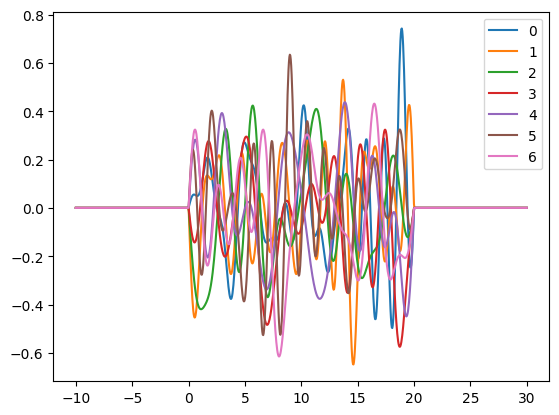

In [120]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots()

xs = np.linspace(-0.5*L, 1.5*L, int(1e3))

# ci = eigvectors[6]

# for j in range(len(ci))[:7]:
#     ys = np.zeros_like(xs)
#     for i in range(len(ci))[:7]:
#         # phi_nx = lambdify((x, n), phin.expr, "numpy")
#         ci = eigvectors[j]
#         ys += ci[i]*phi_nx(xs, i)
#     ax.plot(xs, ys, label=f'{j}')

for i, eigvec in enumerate(eigvectors[indices]):
    ys = np.zeros_like(xs)
    for j, cij in enumerate(eigvec):
        ys += cij * phi_nx(xs, j)
        
    ax.plot(xs, ys, label=f'{i}')
    
ax.legend()
# ax.plot(xs, ys)

plt.show()